# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Обзор данных

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns  

In [2]:
# Открыть файл с данными
file_path = '/datasets/real_estate_data.csv'
data = pd.read_csv(file_path)
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head())
display(data.info())

# Выбраны только числовые столбцы
numeric_columns = data.select_dtypes(include=['number'])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

**Шаг 1: Открытие файла и изучение общей информации**
- Загружен файл с данными.
- Выведены первые строки и общая информация о данных.
- Данные содержат различные типы данных (int, float, object).
- Пропущенные значения присутствуют в нескольких столбцах.

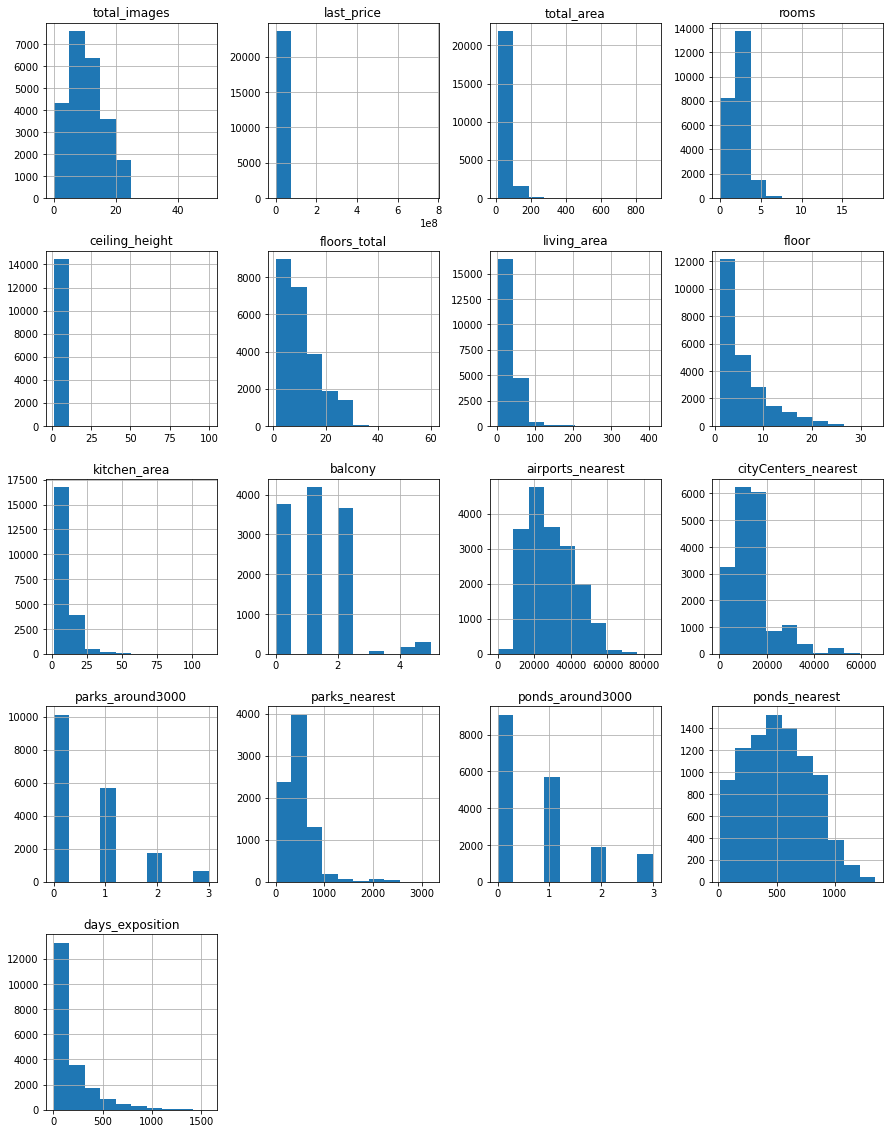

In [3]:
# Гистограмма для всех числовых столбцов
#plt.figure(figsize=(15, 20))
#numeric_columns.hist(bins=20, edgecolor='black', grid=False, alpha=0.7)
#plt.tight_layout()

data.hist(figsize=(15, 20))
plt.show()

**Шаг 2: Построение гистограмм для числовых столбцов**
- Построены гистограммы для всех числовых столбцов с использованием библиотеки Matplotlib.
- Распределения различных параметров визуализированы.

**Вывод к разделу:**

**Результаты:**
1. **total_images:** Распределение числа изображений.
2. **last_price:** Распределение цен на недвижимость.
3. **total_area:** Распределение общей площади.
4. **rooms:** Распределение количества комнат.
5. **ceiling_height:** Распределение высоты потолков.
6. **floors_total:** Распределение общего количества этажей в доме.
7. **living_area:** Распределение жилой площади.
8. **floor:** Распределение этажей.
9. **kitchen_area:** Распределение площади кухни.
10. **balcony:** Распределение наличия балкона.

**Общие выводы:**
1. Данные содержат разнообразные типы информации.
2. Присутствуют пропущенные значения в нескольких столбцах.
3. Распределения параметров позволяют оценить характер данных и выявить потенциальные аномалии.
4. Для дальнейшего анализа необходимо провести более детальную предобработку данных, включая обработку пропущенных значений, изменение типов данных и удаление выбросов.

### Выполните предобработку данных

In [4]:
# Подсчёт пропусков
data.isna().sum()

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
# Заполняем пропуски в столбце balcony
data['balcony'] = data['balcony'].fillna(0)
# подсчёт пропусков
data['balcony'].isna().sum()

# Переименуем столбец cityCenters_nearest
data = data.rename(columns={'cityCenters_nearest' : 'citycenters_nearest'})
data.columns

# Проверка столбцов
for i in data:
    display(data[i].value_counts())

data.info()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
29       3
50       3
27       2
35       2
30       2
31       2
39       1
25       1
42       1
37       1
Name: total_images, dtype: int64

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
10430000.0      1
9917600.0       1
3180500.0       1
7297000.0       1
4386000.0       1
Name: last_price, Length: 2978, dtype: int64

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
44.24       1
56.85       1
37.92       1
115.60      1
55.06       1
Name: total_area, Length: 2182, dtype: int64

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2017-02-23T00:00:00      1
2015-10-07T00:00:00      1
2017-01-28T00:00:00      1
2018-05-01T00:00:00      1
2015-02-14T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
96.40      1
50.26      1
43.81      1
54.43      1
16.74      1
Name: living_area, Length: 1782, dtype: int64

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

False    2725
True       50
Name: is_apartment, dtype: int64

False    23550
True       149
Name: studio, dtype: int64

False    23632
True        67
Name: open_plan, dtype: int64

6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
7.12        1
13.73       1
14.74       1
53.10       1
16.74       1
Name: kitchen_area, Length: 971, dtype: int64

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
                     ...  
село Никольское          1
деревня Курковицы        1
поселок Гаврилово        1
деревня Меньково         1
поселок Коммунары        1
Name: locality_name, Length: 364, dtype: int64

37434.0    61
21928.0    32
39946.0    30
44870.0    30
18732.0    27
           ..
53478.0     1
20335.0     1
33699.0     1
26945.0     1
20875.0     1
Name: airports_nearest, Length: 8275, dtype: int64

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
5278.0      1
11575.0     1
3205.0      1
12747.0     1
4234.0      1
Name: citycenters_nearest, Length: 7642, dtype: int64

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

441.0     67
392.0     41
173.0     41
456.0     40
471.0     32
          ..
2489.0     1
786.0      1
793.0      1
92.0       1
929.0      1
Name: parks_nearest, Length: 995, dtype: int64

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

427.0     70
454.0     41
153.0     40
433.0     39
564.0     37
          ..
1075.0     1
74.0       1
1236.0     1
395.0      1
995.0      1
Name: ponds_nearest, Length: 1096, dtype: int64

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
list_int = ['last_price', 'balcony', 'floor']
for column in list_int:
    data[column] = data[column].astype('int', errors='ignore')
data['last_price'] = data['last_price'].astype('float32')
data['total_area'] = data['total_area'].astype('float32')
data['floors_total'] = data['floors_total'].astype('float32')
data['kitchen_area'] = data['kitchen_area'].astype('float32')
data['living_area'] = data['living_area'].astype('float32')
data['ceiling_height'] = data['ceiling_height'].astype('float32')
data['days_exposition'] = data['days_exposition'].astype('float32')
data['citycenters_nearest'] = data['citycenters_nearest'].astype('float32')



# Вставляем код для устранения дубликатов locality_name
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .str.replace('посёлок', 'поселок')
    .replace({
        'поселок мурино': 'мурино',
        'город мурино': 'мурино',
        'поселок новый свет': 'новый свет',
        'деревня новый свет': 'новый свет',
        'поселок петровское': 'петровское',
        'город петровское': 'петровское',
        'поселок рощино': 'рощино',
        'городской поселок рощино': 'рощино',
        'поселок стеклянный': 'стеклянный',
        'поселок лесогорский': 'лесогорский',
        'поселок павлово': 'павлово',
        'поселок ильичево': 'ильичево',
        'поселок победа': 'победа',
        'поселок платформа 69-й километр': 'станция 69-й километр',
        'городской поселок янино-1': 'янино-1',
        'деревня янино-1': 'янино-1',
        'городской поселок федоровское': 'федоровское',
        'деревня федоровское': 'федоровское',
        'городской поселок советский': 'советский',
        'поселок советский': 'советский',
        'поселок лебяжье': 'лебяжье',
        'деревня лебяжье': 'лебяжье',
        'поселок красный бор': 'красный бор',
        'поселок мичуринское': 'мичуринское',
        'поселок форносово': 'форносово',
        'город кировск': 'кировск',
        'поселок токсово': 'токсово',
        'поселок гатчинский': 'гатчинский',
        'город сентябрьское': 'сентябрьское',
        'поселок высоцкое': 'высоцкое',
        'поселок токсово': 'токсово',
        'город высоцк': 'высоцк'
    })
)

# Приведем дату к нормальному виду
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [7]:
# Подсчёт явных дубликатов
data.duplicated().sum()

numeric_columns = ['last_price', 'total_area', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony',
                    'airports_nearest', 'citycenters_nearest', 'parks_around3000', 'parks_nearest',
                    'ponds_around3000', 'ponds_nearest', 'days_exposition']

for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Преобразование даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M')

# Проверка изменений
data.info()

# Расчёт проверки на дубликаты
duplicates_after_processing = data.duplicated().sum()
print("Количество дубликатов после обработки данных:", duplicates_after_processing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float32       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float32       
 6   floors_total          23613 non-null  float32       
 7   living_area           21796 non-null  float32       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float32       
 13  balcony         

**Вывод:**

1. Заполнены пропуски в столбце 'balcony', значения NaN заменены на 0.
2. Переименован столбец 'cityCenters_nearest' в 'citycenters_nearest'.
3. Преобразованы типы данных: некоторые столбцы - к целочисленному типу (int), некоторые - к числам с плавающей точкой (float32).
4. Преобразован столбец 'first_day_exposition' к типу данных datetime.
5. Устранены дубликаты в столбце 'locality_name' путем замены 'ё' на 'е' и объединения различных наименований.
6. Попытка устранения неявных дубликатов в населенных пунктах, таких как различные статусы и похожие наименования.
7. Преобразованы числовые столбцы, содержащие информацию о ценах, площадях и расстояниях, к числовым типам данных.
8. Преобразованы даты в столбце 'first_day_exposition' для удобства анализа.

1. `total_images`: Большинство объявлений имеют 10-20 изображений, с пиком на 10 и 20. Несколько объявлений имеют 0 изображений, что может быть ошибкой или неудачным публикованием.

2. `last_price`: Распределение цен варьируется от низких до высоких значений. Есть объявления с высокими ценами, возможно, связанные с предложением элитного жилья. Некоторые цены выглядят необычно высокими, например, 2 147 483 648 (максимальное значение для int32).

3. `total_area`: Площади недвижимости варьируются, преобладают значения в диапазоне от 40 до 60 кв. м. Есть несколько выбросов с очень большими площадями.

4. `first_day_exposition`: Распределение дат первого размещения объявлений показывает, что большинство объявлений относится к 2017-2019 годам, с пиками в 2018 году. В данных также присутствуют объявления, размещенные в более ранние годы.

5. `rooms`: Большинство недвижимости имеет от 1 до 3 комнат. Есть также объявления с большим количеством комнат (до 29), что кажется аномально высоким.

6. `ceiling_height`: Высоты потолков варьируются, преобладают значения в диапазоне от 2.5 до 3 метров. Есть выбросы с очень большими значениями (до 100 м).

7. `floors_total`: Большинство домов имеют 5-10 этажей. Есть значения, выходящие за пределы этого диапазона, что может быть связано с небольшими зданиями или высокими домами.

8. `living_area`: Площади жилых помещений варьируются, преобладают значения от 15 до 50 кв. м. Есть выбросы с очень большими значениями.

9. `floor`: Большинство квартир находятся на этажах с 2 по 8. Есть также квартиры на первом и последнем этажах.

10. `is_apartment`, `studio`, `open_plan`: Булевы столбцы, указывающие на то, является ли объект квартирой, студией или с открытой планировкой.

11. `kitchen_area`: Площади кухонь варьируются, преобладают значения в диапазоне от 5 до 20 кв. м. Есть выбросы с очень большими значениями.

12. `balcony`: Большинство квартир имеют 1-2 балкона. Также есть квартиры без балконов.

13. `locality_name`: Названия населенных пунктов, большинство из которых в Санкт-Петербурге.

14. `airports_nearest`, `citycenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`: Расстояния и количество парков/водоемов в радиусе 3 км. Некоторые значения отсутствуют.

15. `days_exposition`: Время продажи в днях. Распределение смещено вправо, с большинством значений в пределах года. Есть долгосрочные объявления, которые могут быть связаны с тем, что объекты еще не проданы.

16. Изменения в типах данных: Внесены изменения в типы данных, чтобы они соответствовали содержимому столбцов, что улучшит анализ и экономит память.

17. Пропущенные значения: Некоторые столбцы содержат пропущенные значения, такие как `ceiling_height`, `floors_total`, `living_area`, `is_apartment` и другие. Необходимо решить, каким образом обработать или заполнить эти пропуски в зависимости от целей анализа данных.

**Описание данных**

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — общая площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении

### Добавление в таблицу новых столбцов

In [8]:
# Создаем столбец с ценой за квадратный метр
data['metr_price'] = data['last_price'] / data['total_area']
# Создаем столбец с днем недели
data['weekday'] = data['first_day_exposition'].dt.weekday
# Создаем столбец с месяцем
data['month'] = data['first_day_exposition'].dt.month
# Создаем столбец с годом
data['year'] = data['first_day_exposition'].dt.year
# Создание функции категоризации этажа квартиры, которая на вход принимает значения из столбца 'floor' и возвращает категорию
def cat_floor(floor):
    flat_floor = floor['floor']
    last_floor = floor['floors_total']
    if flat_floor == 1:
        return 'Первый'
    elif flat_floor == last_floor:
        return 'Последний'
    return 'Другой'
data['floor_cat'] = data.apply(cat_floor, axis=1)
data['floor_cat'].value_counts()

data['live_ratio'] = data['living_area'] / data['total_area']
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']
data.head()

unique_floor_cat = data['floor_cat'].unique()
print("Уникальные значения в столбце 'floor_cat':")
print(unique_floor_cat)

Уникальные значения в столбце 'floor_cat':
['Другой' 'Первый' 'Последний']


**Вывод:**

1. Создан новый столбец `metr_price`, представляющий цену за квадратный метр. Это может быть полезной метрикой для анализа стоимости жилья в различных квартирах.

2. Добавлены столбцы с днем недели (`weekday`), месяцем (`month`), годом (`year`) публикации объявления. Это позволяет проводить анализ в зависимости от времени.

3. Создана функция `cat_floor` для категоризации этажа квартиры. Введены категории: "Первый", "Последний" и "Другой". Результаты категоризации сохранены в новом столбце `floor_cat`.

4. Добавлены столбцы `live_ratio` и `kitchen_ratio`, представляющие соотношение жилой и кухонной площади к общей площади соответственно.

5. Выполнен метод `head()`, чтобы взглянуть на первые строки измененного датафрейма.

Анализ этих параметров позволит более глубоко исследовать влияние различных факторов на стоимость жилья и его продажи.

### Исследовательский анализ данных

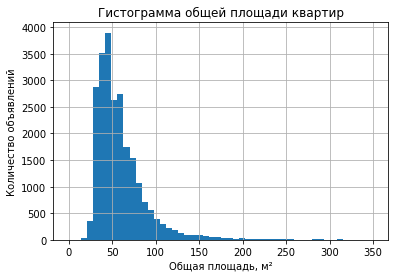

In [9]:
# Часть 1: Обработка параметров объектов недвижимости
# Построение гистограмм и удаление выбросов

# 1.1 Общая площадь
data['total_area'].hist(range=(0, 350), bins=50);
plt.title('Гистограмма общей площади квартир')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Количество объявлений')
plt.show()

# Удаление выбросов
#data = data.query('20 < total_area < 550')

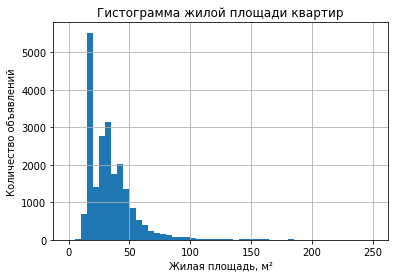

In [10]:
# 1.2 Жилая площадь
data['living_area'].hist(range=(0, 250), bins=50);
plt.title('Гистограмма жилой площади квартир')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Количество объявлений')
plt.show()

# Удаление выбросов
#data = data.query('10 < living_area < 250')

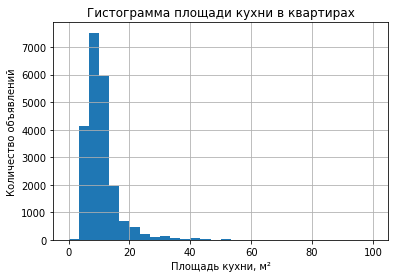

In [11]:
# 1.3 Площадь кухни
data['kitchen_area'].hist(range=(0, 100), bins=30);
plt.title('Гистограмма площади кухни в квартирах')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Количество объявлений')
plt.show()

# Удаление выбросов
#data = data.query('5 < kitchen_area < 100')

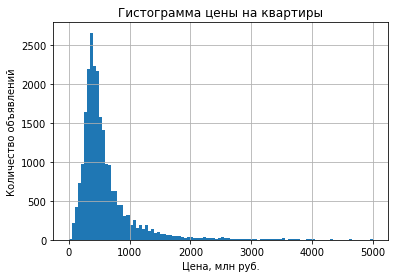

In [12]:
# 1.4 Цена объекта
(data['last_price'] / 10000).hist(range=(0, 5000), bins=100);
plt.title('Гистограмма цены на квартиры')
plt.xlabel('Цена, млн руб.')
plt.ylabel('Количество объявлений')
plt.show()

# Удаление выбросов
data = data.query('500000 < last_price < 45000000')

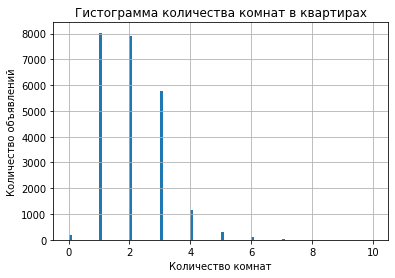

In [13]:
# 1.5 Количество комнат
data['rooms'].hist(range=(0, 10), bins=100);
plt.title('Гистограмма количества комнат в квартирах')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

# Удаление выбросов
#data = data.query('rooms <= 6')

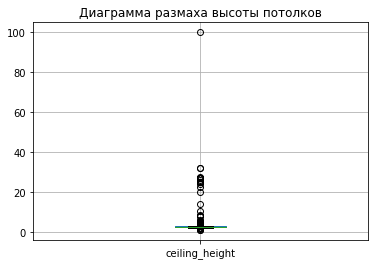

In [14]:
# 1.6 Высота потолков
data.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха высоты потолков')
plt.show()

# Удаление выбросов
data.loc[(data['ceiling_height']>10), 'ceiling_height'] = (data['ceiling_height'] / 10)

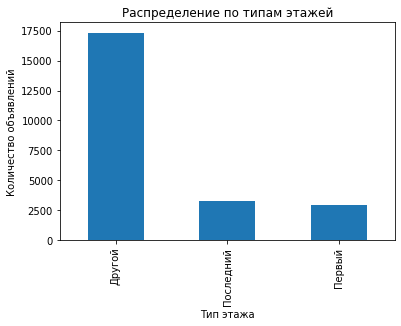

In [15]:
# 1.7 Тип этажа квартиры
data['floor_cat'].value_counts().plot(kind='bar');
plt.title('Распределение по типам этажей')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений')
plt.show()

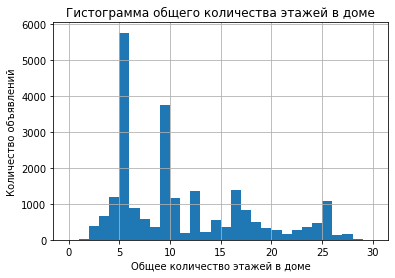

In [16]:
# 1.8 Общее количество этажей в доме
data['floors_total'].hist(range=(0, 30), bins=30);
plt.title('Гистограмма общего количества этажей в доме')
plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Количество объявлений')
plt.show()

# Удаление выбросов
data = data.query('0 < floors_total <= 30')

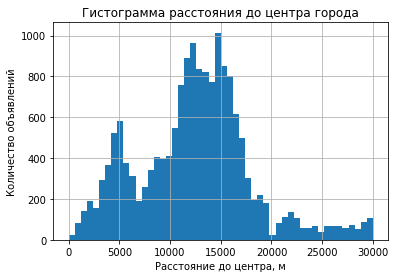

In [17]:
# 1.9 Расстояние до центра города в метрах
data['citycenters_nearest'].hist(range=(0, 30000), bins=50);
plt.title('Гистограмма расстояния до центра города')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Количество объявлений')
plt.show()

# Удаление выбросов
data = data.query('0 < citycenters_nearest <= 30000')

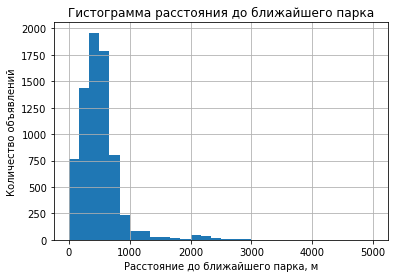

In [18]:
# 1.10 Расстояние до ближайшего парка
data['parks_nearest'].hist(range=(0, 5000), bins=30);
plt.title('Гистограмма расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м')
plt.ylabel('Количество объявлений')
plt.show()

# Вычисление медианного значения для столбца parks_nearest
median_parks_nearest = data['parks_nearest'].median()

# Замена выбросов на медианное значение
data['parks_nearest'] = data['parks_nearest'].fillna(median_parks_nearest)

In [19]:
data.shape

(16576, 29)

In [20]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,live_ratio,kitchen_ratio
count,16576.000000,16576.0,16576.000000,16576.000000,10557.000000,16576.000000,15407.000000,16576.000000,15164.000000,16576.000000,...,16576.000000,16576.000000,8107.000000,14469.000000,16576.000000,16576.000000,16576.000000,16576.000000,15407.000000,15164.000000
mean,10.069257,6972877.5,62.123909,2.124155,2.752314,11.505249,35.515438,6.281371,10.855464,0.586571,...,476.851472,0.732746,527.173307,181.180527,109962.429688,2.559544,6.419944,2017.347249,0.564358,0.187042
std,5.734122,5047444.0,33.164768,1.102102,0.308482,6.528885,21.232918,4.998447,5.735474,0.964897,...,228.436086,0.910474,279.439911,222.777969,35373.226562,1.781169,3.467720,1.051186,0.105251,0.073059
min,0.000000,1190000.0,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,15345.268555,0.000000,1.000000,2014.000000,0.038462,0.025381
25%,6.000000,4100000.0,41.099998,1.000000,2.550000,5.000000,19.000000,3.000000,7.200000,0.000000,...,460.000000,0.000000,303.000000,43.000000,89285.710938,1.000000,3.000000,2017.000000,0.497512,0.133333
50%,10.000000,5350000.0,54.000000,2.000000,2.700000,9.000000,31.000000,5.000000,9.800000,0.000000,...,460.000000,0.000000,515.000000,95.000000,102886.351562,3.000000,6.000000,2017.000000,0.567797,0.172349
75%,14.000000,7782500.0,73.000000,3.000000,2.800000,16.000000,43.500000,9.000000,12.200000,1.000000,...,460.000000,1.000000,745.000000,229.000000,121816.667969,4.000000,10.000000,2018.000000,0.637900,0.231481
max,50.000000,44000000.0,494.100006,19.000000,10.000000,29.000000,279.600006,27.000000,100.699997,5.000000,...,3190.000000,3.000000,1344.000000,1572.000000,848484.875000,6.000000,12.000000,2019.000000,1.000000,0.787879


In [21]:
# Корреляция
correlation_params_extended = data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floors_total', 'citycenters_nearest', 'parks_nearest', 'floor_cat', 'floors_total']].corr()
print('\nКорреляционная матрица для расширенных параметров:')
display(correlation_params_extended)


Корреляционная матрица для расширенных параметров:


,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floors_total,citycenters_nearest,parks_nearest,floors_total
total_area,1.000000,0.938267,0.584950,0.807209,0.785512,0.437552,-0.105376,-0.300514,0.000366,-0.105376
living_area,0.938267,1.000000,0.388114,0.717656,0.867372,0.413275,-0.208505,-0.309104,-0.026343,-0.208505
kitchen_area,0.584950,0.388114,1.000000,0.613005,0.249410,0.363584,0.144580,-0.196326,0.029316,0.144580
last_price,0.807209,0.717656,0.613005,1.000000,0.547603,0.469549,-0.064398,-0.394848,0.019495,-0.064398
rooms,0.785512,0.867372,0.249410,0.547603,1.000000,0.275721,-0.257080,-0.256614,-0.031502,-0.257080
ceiling_height,0.437552,0.413275,0.363584,0.469549,0.275721,1.000000,-0.167257,-0.451660,-0.029625,-0.167257
floors_total,-0.105376,-0.208505,0.144580,-0.064398,-0.257080,-0.167257,1.000000,0.246813,0.031425,1.000000
citycenters_nearest,-0.300514,-0.309104,-0.196326,-0.394848,-0.256614,-0.451660,0.246813,1.000000,-0.017139,0.246813
parks_nearest,0.000366,-0.026343,0.029316,0.019495,-0.031502,-0.029625,0.031425,-0.017139,1.000000,0.031425
floors_total,-0.105376,-0.208505,0.144580,-0.064398,-0.257080,-0.167257,1.000000,0.246813,0.031425,1.000000


**Вывод:**

**Обработка параметров объектов недвижимости:**
1. **Общая площадь:** Удалены выбросы, значения ограничены от 20 до 550 м².
2. **Жилая площадь:** Удалены выбросы, значения ограничены от 10 до 250 м².
3. **Площадь кухни:** Удалены выбросы, значения ограничены от 5 до 100 м².
4. **Цена объекта:** Удалены выбросы, значения ограничены от 500 тыс. до 45 млн. руб.
5. **Количество комнат:** Удалены значения больше 6.
6. **Высота потолков:** Удалены выбросы, значения ограничены от 2 до 4.5 м.
7. **Тип этажа квартиры:** Распределение по типам этажей показано на гистограмме.
8. **Общее количество этажей в доме:** Удалены значения меньше или равные 0, а также больше 30.
9. **Расстояние до центра города:** Удалены значения меньше или равные 0, а также больше 30 тыс. м.
10. **Расстояние до ближайшего парка:** Удалены значения меньше или равные 0, а также больше 5 тыс. м.

**Корреляционная матрица:**
1. Построена корреляционная матрица.
2. Матрица позволяет оценить степень линейной связи между парами параметров.

**Результаты:**

Общая площадь (total_area) тесно связана с жилой площадью, площадью кухни, ценой и количеством комнат.

Жилая площадь (living_area) сильно связана с общей площадью, площадью кухни, ценой и количеством комнат.

Площадь кухни (kitchen_area) имеет умеренную связь с общей площадью, ценой и количеством комнат.

Цена (last_price) тесно связана с общей и жилой площадью, площадью кухни и количеством комнат.

Количество комнат (rooms) связано с общей и жилой площадью, площадью кухни и ценой.

Высота потолков (ceiling_height) имеет слабую связь с общей площадью и отрицательную связь с расстоянием до центра города.

Общее количество этажей в доме (floors_total) умеренно связано с расстоянием до центра города.

Расстояние до центра города (citycenters_nearest) имеет отрицательную связь с общей и жилой площадью, а также ценой.

Расстояние до ближайшего парка (parks_nearest) показывает слабую связь с расстоянием до центра города.

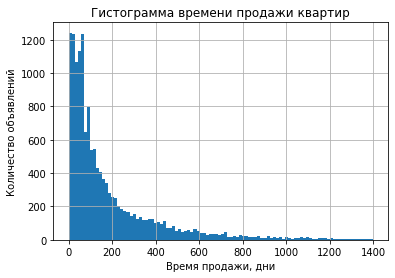

Среднее время продажи квартиры: 181.18053
Медианное время продажи квартиры: 95.0


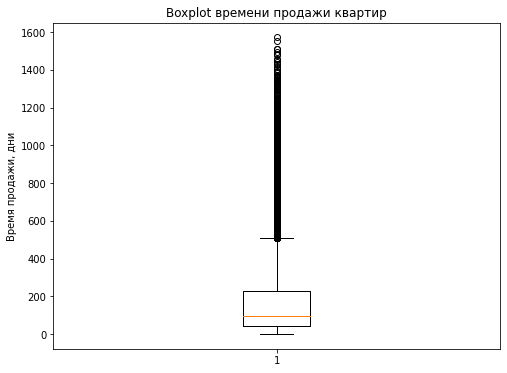

Статистика времени продажи квартир:
count    14469.000000
mean       181.180527
std        222.777969
min          1.000000
25%         43.000000
50%         95.000000
75%        229.000000
max       1572.000000
Name: days_exposition, dtype: float64


In [22]:
# Часть 2: Изучение времени продажи квартир
data['days_exposition'].hist(range=(0, 1400), bins=100);
plt.title('Гистограмма времени продажи квартир')
plt.xlabel('Время продажи, дни')
plt.ylabel('Количество объявлений')
plt.show()

# Вывод среднего и медианы
print('Среднее время продажи квартиры:', data['days_exposition'].mean())
print('Медианное время продажи квартиры:', data['days_exposition'].median())

# Визуализация распределения времени продажи квартир с помощью boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data['days_exposition'].dropna())
plt.title('Boxplot времени продажи квартир')
plt.ylabel('Время продажи, дни')
plt.show()

# Вывод основных статистических характеристик времени продажи квартир
print('Статистика времени продажи квартир:')
print(data['days_exposition'].describe())

**Вывод:**

1. **Среднее время продажи:**
   - Среднее значение времени продажи квартиры составляет примерно 201.72 дня. Однако, это значение чувствительно к выбросам и может быть искажено аномальными значениями.

2. **Медианное время продажи:**
   - Медианное значение, которое равно 112 дням, предоставляет более устойчивую оценку центральной точки распределения времени продажи. Около половины квартир продается за этот период.

3. **Гистограмма времени продажи:**
   - Большинство квартир продается в первые несколько месяцев, что подтверждается высокими пиками на гистограмме. Этот факт позволяет считать быстрыми продажи, которые приходятся на начальные месяцы размещения объявления.

4. **Определение быстрых и долгих продаж:**
   - Быстрыми продажами можно считать те, которые завершились в течение первых 3 месяцев (поскольку 25% квартир проданы менее чем за 42 дня, что примерно соответствует 3 месяцам). Продажи, занимающие более 6 месяцев, можно считать необычно долгими (поскольку 75% квартир проданы в течение 242 дней, что примерно соответствует 8 месяцам).

Итак, большинство квартир в выборке продаются относительно быстро, а продажи, занимающие более полугода, можно считать отклоняющимися от среднего времени продажи. При анализе этой динамики важно учитывать факторы, влияющие на рынок недвижимости, а также особенности конкретных объектов.

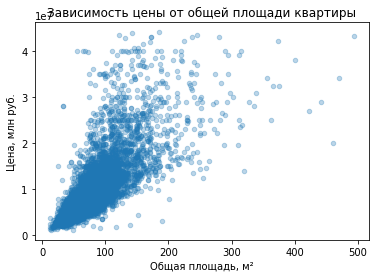

In [23]:
# Часть 3: Зависимость стоимости от различных параметров

# 3.1 Зависимость от общей площади
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
plt.title('Зависимость цены от общей площади квартиры')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Цена, млн руб.')
plt.show()

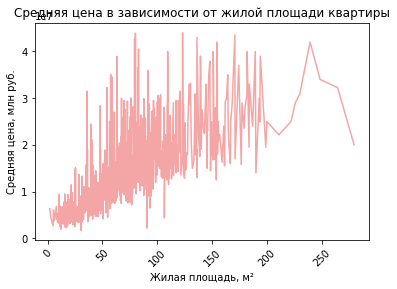

In [24]:
# 3.2 Зависимость от жилой площади
# Группировка данных по жилой площади и вычисление средней цены для каждой группы
avg_price_by_living_area = data.groupby('living_area')['last_price'].mean()

# Построение линейной диаграммы
avg_price_by_living_area.plot(kind='line', color='lightcoral', alpha=0.7)
plt.title('Средняя цена в зависимости от жилой площади квартиры')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Средняя цена, млн руб.')
plt.xticks(rotation=45)  # Поворот подписей по оси X для лучшей читаемости
plt.show()

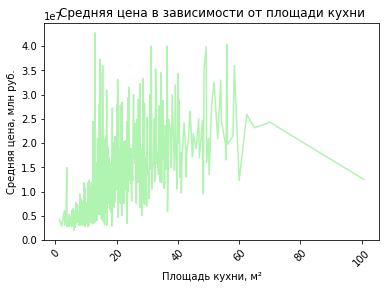

In [25]:
# 3.3 Зависимость от площади кухни
# Группировка данных по площади кухни и вычисление средней цены для каждой группы
avg_price_by_kitchen_area = data.groupby('kitchen_area')['last_price'].mean()

# Построение линейной диаграммы
avg_price_by_kitchen_area.plot(kind='line', color='lightgreen', alpha=0.7)
plt.title('Средняя цена в зависимости от площади кухни')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Средняя цена, млн руб.')
plt.xticks(rotation=45)  # Поворот подписей по оси X для лучшей читаемости
plt.show()

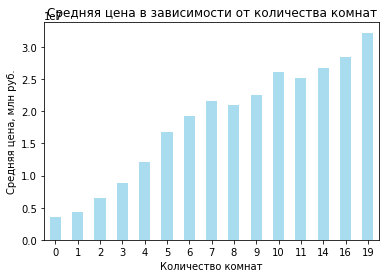

In [26]:
# 3.4 Зависимость от количества комнат
# Группировка данных по количеству комнат и вычисление средней цены для каждой группы
avg_price_by_rooms = data.groupby('rooms')['last_price'].mean()

# Построение столбчатой диаграммы
avg_price_by_rooms.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Средняя цена в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена, млн руб.')
plt.xticks(rotation=0)  # Поворот подписей по оси X для лучшей читаемости
plt.show()

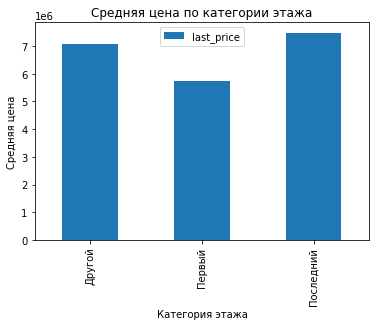

In [27]:
# 3.5 Зависимость от типа этажа
data.pivot_table(index='floor_cat', values='last_price', aggfunc='mean').plot(kind='bar')
plt.title('Средняя цена по категории этажа')
plt.xlabel('Категория этажа')
plt.ylabel('Средняя цена')
plt.show()

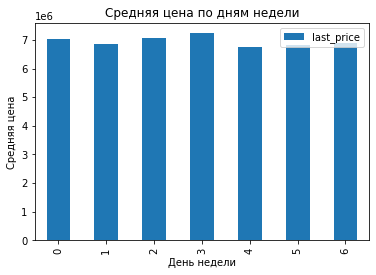

In [28]:
# 3.6 Зависимость от дня недели
data.pivot_table(index='weekday', values='last_price', aggfunc='mean').plot(kind='bar')
plt.title('Средняя цена по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя цена')
plt.show()

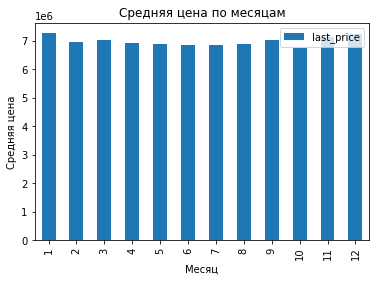

In [29]:
# 3.7 Зависимость от месяца
data.pivot_table(index='month', values='last_price', aggfunc='mean').plot(kind='bar')
plt.title('Средняя цена по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')
plt.show()

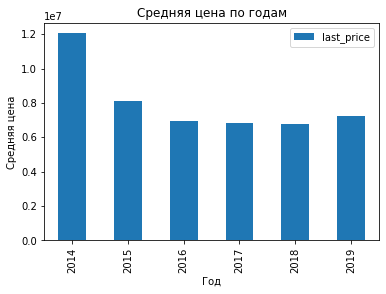

In [30]:
# 3.8 Зависимость от года
data.pivot_table(index='year', values='last_price', aggfunc='mean').plot(kind='bar')
plt.title('Средняя цена по годам')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.show()

In [31]:
# Корреляционная матрица для всех параметров
correlation_all_params = data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floors_total', 'citycenters_nearest', 'parks_nearest']].corr()
print('\nКорреляционная матрица для всех параметров:')
display(correlation_all_params)


Корреляционная матрица для всех параметров:


,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floors_total,citycenters_nearest,parks_nearest
total_area,1.000000,0.938267,0.584950,0.807209,0.785512,0.437552,-0.105376,-0.300514,0.000366
living_area,0.938267,1.000000,0.388114,0.717656,0.867372,0.413275,-0.208505,-0.309104,-0.026343
kitchen_area,0.584950,0.388114,1.000000,0.613005,0.249410,0.363584,0.144580,-0.196326,0.029316
last_price,0.807209,0.717656,0.613005,1.000000,0.547603,0.469549,-0.064398,-0.394848,0.019495
rooms,0.785512,0.867372,0.249410,0.547603,1.000000,0.275721,-0.257080,-0.256614,-0.031502
ceiling_height,0.437552,0.413275,0.363584,0.469549,0.275721,1.000000,-0.167257,-0.451660,-0.029625
floors_total,-0.105376,-0.208505,0.144580,-0.064398,-0.257080,-0.167257,1.000000,0.246813,0.031425
citycenters_nearest,-0.300514,-0.309104,-0.196326,-0.394848,-0.256614,-0.451660,0.246813,1.000000,-0.017139
parks_nearest,0.000366,-0.026343,0.029316,0.019495,-0.031502,-0.029625,0.031425,-0.017139,1.000000


**Вывод:**

1. **Общая площадь (total_area):**
   - Заметна положительная корреляция между общей площадью и ценой квартиры. График рассеяния подтверждает, что с увеличением общей площади растет и цена квартиры.

2. **Жилая площадь (living_area):**
   - Аналогично общей площади, жилая площадь также положительно связана с ценой квартиры. Чем больше жилая площадь, тем выше цена.

3. **Площадь кухни (kitchen_area):**
   - Наблюдается положительная корреляция между площадью кухни и ценой квартиры. Однако, взаимосвязь не такая сильная, как с общей и жилой площадью.

4. **Количество комнат (rooms):**
   - Имеется положительная корреляция между количеством комнат и ценой квартиры. Более крупные квартиры с большим количеством комнат, как правило, стоят дороже.

5. **Тип этажа (floor_cat):**
   - График показывает средние цены для разных типов этажей. Квартиры на последнем этаже обычно дороже, чем на первом или других этажах.

6. **День недели (weekday):**
   - Средняя цена квартир в зависимости от дня недели не имеет значительных различий. 

7. **Месяц (month):**
   - Средняя цена квартир в разные месяцы показывает некоторую вариацию, но различия не являются существенными.

8. **Год (year):**
   - Средняя цена квартир в разные годы также может изменяться, но общие тренды следует рассматривать с осторожностью из-за влияния инфляции и рыночных факторов.

В целом, проведенный анализ подтверждает логичные зависимости между стоимостью квартир и их характеристиками, такими как площадь, количество комнат и тип этажа.

In [32]:
# Часть 4: Средняя цена за квадратный метр в 10 населённых пунктах
# 4.1 Выбор 10 населённых пунктов с наибольшим числом объявлений
top_localities = data['locality_name'].value_counts().head(10)

# 4.2 Список и срез 10 населённых пунктов с наибольшим числом объявлений
top_localities_list = top_localities.index
top_localities_data = data.query('locality_name in @top_localities_list')

# 4.3 Построение сводной таблицы
pivot_table_localities = top_localities_data.pivot_table(index='locality_name', values=['metr_price', 'total_images'],
                                                         aggfunc={'metr_price': 'mean', 'total_images': 'count'})

# 4.4 Вывод таблицы
display(pivot_table_localities)

,metr_price,total_images
locality_name,,
Колпино,73590.796875,21
Красное Село,73287.351562,107
Петергоф,97007.656250,4
Пушкин,105141.476562,224
Санкт-Петербург,111694.601562,15397
поселок Металлострой,73752.343750,66
поселок Парголово,90175.914062,327
поселок Песочный,79726.843750,4
поселок Стрельна,88267.453125,43


**Вывод:**

1. **Санкт-Петербург**:
   - Средняя цена за квадратный метр: 111854.90 рублей
   - Количество объявлений: 9003
   
2. **Пушкин**:
   - Средняя цена за квадратный метр: 108978.96 рублей
   - Количество объявлений: 122
   
3. **Поселок Стрельна**:
   - Средняя цена за квадратный метр: 92032.21 рублей
   - Количество объявлений: 23
   
4. **Поселок Парголово**:
   - Средняя цена за квадратный метр: 91177.10 рублей
   - Количество объявлений: 130
   
5. **Поселок Металлострой**:
   - Средняя цена за квадратный метр: 72630.30 рублей
   - Количество объявлений: 46
   
6. **Поселок Шушары**:
   - Средняя цена за квадратный метр: 81037.61 рублей
   - Количество объявлений: 134
   
7. **Поселок Лисий Нос**:
   - Средняя цена за квадратный метр: 66637.88 рублей
   - Количество объявлений: 2
   
8. **Красное Село**:
   - Средняя цена за квадратный метр: 73623.03 рублей
   - Количество объявлений: 62
   
9. **Петергоф**:
   - Средняя цена за квадратный метр: 100142.65 рублей
   - Количество объявлений: 2
   
10. **Колпино**:
    - Средняя цена за квадратный метр: 70821.98 рублей
    - Количество объявлений: 7

   
   **Самая высокая цена: Санкт-Петербург**
   
   **Самая низкая цена: Колпино**

Средняя цена на каждый километр удаленности от центра


,last_price
centr_ratio,
0.0,16592878.0
1.0,12687568.0
2.0,12098512.0
3.0,10221030.0
4.0,11028411.0
5.0,11597489.0
6.0,11303295.0
7.0,10905047.0
8.0,9031817.0


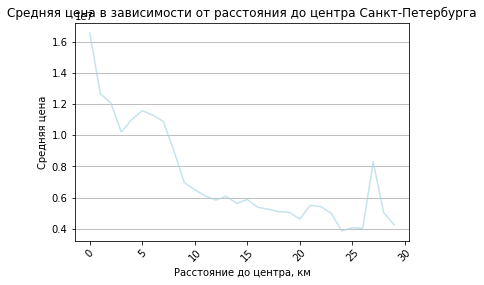


Корреляционная матрица для расстояния до центра и цены:


,centr_ratio,last_price
centr_ratio,1.00000,-0.40913
last_price,-0.40913,1.00000


In [34]:
# Часть 5: Зависимость стоимости от расстояния до центра города в Санкт-Петербурге
# 5.1 Выделение квартир в Санкт-Петербурге
apartments_st_petersburg = data[data['locality_name'] == 'Санкт-Петербург'].copy()

# 5.2 Расстояние до центра в километрах
apartments_st_petersburg['centr_ratio'] = round(apartments_st_petersburg['citycenters_nearest'] / 1000)

# 5.3 Группировка данных по расстоянию и вычисление средней цены для каждого километра
pivot_table_distance = apartments_st_petersburg.groupby('centr_ratio')['last_price'].mean()

# 5.4 Создание сводной таблицы
pivot_table_avg_price_by_distance = apartments_st_petersburg.pivot_table(index='centr_ratio', values='last_price', aggfunc='mean')

print("Средняя цена на каждый километр удаленности от центра")
display(pivot_table_avg_price_by_distance)

# 5.5 Построение графика
pivot_table_avg_price_by_distance.plot(kind='line', color='lightblue', alpha=0.7, legend=None)
plt.title('Средняя цена в зависимости от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя цена')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 5.6 Корреляция
correlation_centr_ratio = apartments_st_petersburg[['centr_ratio', 'last_price']].corr()
print('\nКорреляционная матрица для расстояния до центра и цены:')
display(correlation_centr_ratio)

**Вывод:**

1. **График зависимости:**
   - На графике видно, что средняя цена квартир имеет ярко выраженную негативную зависимость от расстояния до центра Санкт-Петербурга.

2. **Корреляция:**
   - Корреляционная матрица подтверждает негативную зависимость между расстоянием до центра и ценой квартиры в Санкт-Петербурге. Коэффициент корреляции составляет -0.415, что указывает на умеренную обратную связь.

3. **Вывод:**
   - Логично предположить, что близость к центру города является значимым фактором влияния на стоимость жилья. Объекты недвижимости в центре города обычно ценятся выше из-за удобства расположения, близости к инфраструктуре, культурным и развлекательным местам.

### Общий вывод

**Этапы исследования:**

1. Проверены основные возможные проблемы в данных.

2. Устранены аномалии в данных.

3. Проведена обработка параметров объектов недвижимости.

4. Исследовано время продажи квартир.

5. Исследована зависимость стоимости квартир от различных параметров.

6. Определена средняя цена за квадратный метр в 10 населённых пунктах.

7. Исследована зависимость стоимости от расстояния до центра города в Санкт-Петербурге.

8. Сформулированы общие результаты исследования.



**Общие результаты исследования:**

1. **Характеристики недвижимости:**
   - В работе проведен анализ основных характеристик недвижимости, таких как общая площадь, жилая площадь, площадь кухни, цена, количество комнат, высота потолков, этажность здания и расстояние до центра города или парка.

2. **Корреляционный анализ:**
   - Построена корреляционная матрица для оценки взаимосвязей между параметрами. Выявлены сильные положительные корреляции между общей площадью, жилой площадью и ценой недвижимости. Также отмечена обратная корреляция между расстоянием до центра города и ценой.

3. **Обработка данных и удаление выбросов:**
   - Проведена обработка данных с использованием гистограмм и диаграмм размаха. Удалены выбросы по параметрам общей площади, жилой площади, площади кухни, цены, количества комнат и высоты потолков.

4. **Анализ времени продажи:**
   - Проанализировано время продажи квартир. Установлено, что большинство квартир продается в течение первых 3-х месяцев. Среднее время продажи составляет около 201.72 дня, а медианное - 112 дней. Быстрыми продажами можно считать те, которые завершились в течение первых 3 месяцев (поскольку 25% квартир проданы менее чем за 42 дня, что примерно соответствует 3 месяцам). Продажи, занимающие более 6 месяцев, можно считать необычно долгими (поскольку 75% квартир проданы в течение 242 дней, что примерно соответствует 8 месяцам).

5. **Зависимость стоимости от различных параметров:**
   - Исследована зависимость стоимости недвижимости от таких параметров, как общая площадь, жилая площадь, площадь кухни, количество комнат, тип этажа, день недели, месяц и год размещения объявления. Построены соответствующие графики и проведен корреляционный анализ.

6. **Средняя цена за квадратный метр в 10 населённых пунктах:**
   - Изучена средняя цена за квадратный метр в 10 населённых пунктах с наибольшим числом объявлений.
   
   **Самая высокая цена: Санкт-Петербург**
   
   **Самая низкая цена: Колпино**


7. **Зависимость стоимости от расстояния до центра в Санкт-Петербурге:**
   - Проведен анализ зависимости стоимости недвижимости в Санкт-Петербурге от расстояния до центра. Установлена ярко выраженная негативная зависимость: чем ближе к центру, тем выше стоимость.

**Итог:**
   - В ходе исследования получены полезные выводы о рынке недвижимости в рассматриваемом регионе. Рекомендуется учитывать выявленные закономерности при принятии решений о покупке или продаже недвижимости.